In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data.csv")
df

,PM10,Overall_AQI
0,61.5,97
1,69.5,92
2,95.0,178
3,130.0,193
4,106.0,139
5,172.0,252
6,129.0,178
7,56.0,87
8,116.0,116
9,93.0,105


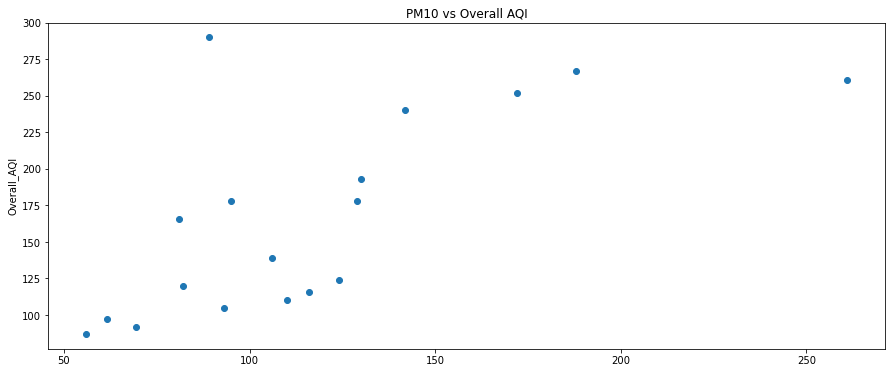

In [3]:
fig=plt.figure()
plt.title('PM10 vs Overall AQI')
plt.scatter(df.PM10,df.Overall_AQI)
plt.ylabel('Overall_AQI')
plt.tight_layout
fig.set_figheight(6)
fig.set_figwidth(15)
plt.show()

In [4]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [5]:
y = df["Overall_AQI"].tolist()
x = df["PM10"].tolist()
df_model = sm.OLS(y,x).fit()
df_model

In [6]:
df_model.summary()

C:\Users\kusha\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              174.0
Date:                Thu, 10 Mar 2022   Prob (F-statistic):                    2.33e-10
Time:                        09:44:38   Log-Likelihood:                         -97.251
No. Observations:                  18   AIC:                                      196.5
Df Residuals:                      17   BIC:                                      197.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3554      0.103     13.193      0.000       1.139       1.572
==============================================================================
Omnibus:                       10.696   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                8.707
Skew:                           1.077   Prob(JB):                       0.0129
Kurtosis:                       5.639   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
def test_model(col):
    s = []

    for i in col:
        a = [1,i]
        s.append(a)
    return (np.array(s))

prof_model = test_model(df["Overall_AQI"])
prof_model

array([[  1,  97],
       [  1,  92],
       [  1, 178],
       [  1, 193],
       [  1, 139],
       [  1, 252],
       [  1, 178],
       [  1,  87],
       [  1, 116],
       [  1, 105],
       [  1, 120],
       [  1, 166],
       [  1, 240],
       [  1, 110],
       [  1, 267],
       [  1, 124],
       [  1, 261],
       [  1, 290]])

In [8]:
#breuschpagan Test

#H0 : Homoscdasticity is present The residual are didtributed with equal variance
#HA : Hetroscdasticity is present The residual are not distributed with equal variance

from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(df_model.resid,prof_model)
print("LM Test P_value")
print(bp_test[1])

LM Test P_value
0.02162254044256042


In [9]:
#White Test

from statsmodels.stats.diagnostic import het_white
bp_test = het_white(df_model.resid,prof_model)
print("LM Test P_value")
print(bp_test[1])

LM Test P_value
0.011550402047001921


In [10]:
#Removing hetro

#Log Transfrom

df['log_Overall_AQI'] = np.log(df['Overall_AQI'])
f = 'log_Overall_AQI~PM10'
df1_model = ols(formula= f, data=df).fit()

#Using   same 2d reshaping function as   previous step
# breuschpagan after transform
log_NOX_model = test_model(df['log_Overall_AQI'])
bp_test = het_breuschpagan(df1_model.resid, log_NOX_model)
print(bp_test[1])

0.1333061504076773


In [11]:
df1_model.summary()

C:\Users\kusha\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        log_Overall_AQI   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     14.45
Date:                Thu, 10 Mar 2022   Prob (F-statistic):            0.00157
Time:                        09:44:38   Log-Likelihood:                -2.9497
No. Observations:                  18   AIC:                             9.899
Df Residuals:                      16   BIC:                             11.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3981      0.184     23.888      0.000       4.008       4.788
PM10           0.0055      0.001      3.802      0.002       0.002       0.009
==============================================================================
Omnibus:                        5.442   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                3.166
Skew:                           0.980   Prob(JB):                        0.205
Kurtosis:                       3.615   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
#white test after transform
log_NOX_model = test_model(df['log_Overall_AQI'])
w_test = het_white(df_model.resid, log_NOX_model)
print(w_test[1])

0.03255367090476233


In [13]:
#Box Cox Transform
from scipy import stats
x,_=stats.boxcox(df['Overall_AQI'])
df['trans_Overall_AQI'] = x
f= 'trans_Overall_AQI~PM10'
df2_model = ols(formula=f, data= df).fit()

#using the same 2d reshaping func as the prev step
# breuschpagan after transform
trans_Overall_AQI_model = test_model(df['trans_Overall_AQI'])
bp_test = het_breuschpagan(df2_model.resid,trans_Overall_AQI_model)
print('LM-test p value')
print(bp_test[1])

LM-test p value
0.17713664607343282


In [14]:
print(df2_model.summary())

                            OLS Regression Results                            
Dep. Variable:      trans_Overall_AQI   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     14.39
Date:                Thu, 10 Mar 2022   Prob (F-statistic):            0.00160
Time:                        09:44:38   Log-Likelihood:                 23.754
No. Observations:                  18   AIC:                            -43.51
Df Residuals:                      16   BIC:                            -41.73
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4807      0.042     59.400      0.0

C:\Users\kusha\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
#white test after transform
trans_profits_model = test_model(df['trans_Overall_AQI'])
w_test = het_white(df2_model.resid,trans_profits_model)
print('LM-test p value')
print(w_test[1])

LM-test p value
0.0787784632736675
